# **MINOR PROJECT**

---






# **TASK 1** - Exploratory Data Analysis

<-----------------------Question 1----------------------------->

In [ ]:
#----------code

In [1]:
!wget https://www.kaggle.com/datasets/elmartini/gender-development-index-2019

--2023-07-02 12:59:35--  https://www.kaggle.com/datasets/elmartini/gender-development-index-2019
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘gender-development-index-2019’

gender-development-     [ <=>                ]  13.81K  --.-KB/s    in 0s      

2023-07-02 12:59:36 (87.9 MB/s) - ‘gender-development-index-2019’ saved [14144]



In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix


In [3]:
gd=pd.read_csv('GDI.csv')
gd

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
0,NaN,NaN,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
1,1.0,Norway,0.990,1,0.949,0.959,84.4,80.4,18.8,17.4,13.0,12.8,"58,548","74,280"
2,2.0,Ireland,0.981,1,0.943,0.961,83.9,80.7,18.8,18.6,12.9,12.4,"55,540","81,401"
3,2.0,Switzerland,0.968,2,0.934,0.965,85.6,81.9,16.2,16.4,12.7,13.6,"57,840","81,137"
4,4.0,"Hong Kong, China (SAR)",0.972,2,0.933,0.959,87.7,82.0,17.1,16.8,11.9,12.7,"45,961","82,993"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,185.0,Burundi,0.999,1,0.432,0.432,63.4,59.8,11.0,11.1,2.6,4.1,866,640
186,185.0,South Sudan,0.842,5,0.384,0.456,59.4,56.4,3.5,5.9,3.9,5.2,"1,759","2,247"
187,187.0,Chad,0.764,5,0.342,0.448,55.7,52.8,5.9,8.8,1.3,3.8,"1,244","1,868"
188,188.0,Central African Republic,0.801,5,0.351,0.438,55.5,51.1,6.2,8.9,3.0,5.6,792,"1,197"


In [4]:
gd.isna().sum()

HDI Rank                      1
Country                       1
GDI_Value                     0
GDI_Group                     0
HDI_Female                    0
HDI_Male                      0
Lif_Expec_Female              0
Lif_Excep_Male                0
Excep_Yrs_Schooling_Female    0
Excep_Yrs_Schooling_Male      0
Mean_Yrs_Schooling_Female     0
Mean_Yrs_Schooling_Male       0
GNI_PC_Female                 0
GNI_PC_Male                   0
dtype: int64

In [5]:
gd.dropna()

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
1,1.0,Norway,0.990,1,0.949,0.959,84.4,80.4,18.8,17.4,13.0,12.8,"58,548","74,280"
2,2.0,Ireland,0.981,1,0.943,0.961,83.9,80.7,18.8,18.6,12.9,12.4,"55,540","81,401"
3,2.0,Switzerland,0.968,2,0.934,0.965,85.6,81.9,16.2,16.4,12.7,13.6,"57,840","81,137"
4,4.0,"Hong Kong, China (SAR)",0.972,2,0.933,0.959,87.7,82.0,17.1,16.8,11.9,12.7,"45,961","82,993"
5,4.0,Iceland,0.969,2,0.933,0.963,84.5,81.5,20.2,18.0,12.6,13.0,"46,413","62,883"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,185.0,Burundi,0.999,1,0.432,0.432,63.4,59.8,11.0,11.1,2.6,4.1,866,640
186,185.0,South Sudan,0.842,5,0.384,0.456,59.4,56.4,3.5,5.9,3.9,5.2,"1,759","2,247"
187,187.0,Chad,0.764,5,0.342,0.448,55.7,52.8,5.9,8.8,1.3,3.8,"1,244","1,868"
188,188.0,Central African Republic,0.801,5,0.351,0.438,55.5,51.1,6.2,8.9,3.0,5.6,792,"1,197"


In [6]:
gd.describe()

,HDI Rank
count,189.000000
mean,94.783069
std,54.754486
min,1.000000
25%,48.000000
50%,95.000000
75%,142.000000
max,189.000000


In [7]:
gd.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
185    False
186    False
187    False
188    False
189    False
Length: 190, dtype: bool

Summarizing your analysis and observation

As there is only ONE missing value in the dataset we can drop it out of the set, i.e. rank and country .

<-----------------------Question 2----------------------------->

In [ ]:
#--------------code

In [8]:
gd['GDI_Value']

0       2019
1      0.990
2      0.981
3      0.968
4      0.972
       ...  
185    0.999
186    0.842
187    0.764
188    0.801
189    0.724
Name: GDI_Value, Length: 190, dtype: object

In [9]:
gd[gd['GDI_Value']=='..']

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
21,19.0,Liechtenstein,..,..,..,..,..,..,13.8,16.0,..,..,..,..
36,36.0,Andorra,..,..,..,..,..,..,..,..,10.4,10.6,..,..
50,50.0,Palau,..,..,..,..,..,..,16.3,15.3,..,..,..,..
58,58.0,Bahamas,..,..,..,..,76.1,71.7,..,..,11.7,11.4,"27,560","40,295"
67,67.0,Seychelles,..,..,..,..,77.4,69.9,15.3,13.1,9.9,10.1,..,..
74,74.0,Grenada,..,..,..,..,75.0,70.1,17.0,16.2,..,..,..,..
76,74.0,Saint Kitts and Nevis,..,..,..,..,..,..,14.0,13.7,..,..,..,..
78,78.0,Antigua and Barbuda,..,..,..,..,78.1,75.9,13.2,12.1,..,..,..,..
93,93.0,Fiji,..,..,..,..,69.3,65.7,..,..,11.0,10.8,"8,317","17,577"
94,94.0,Dominica,..,..,..,..,..,..,..,..,..,..,..,..


In [10]:
gd = gd.replace({'..':'0'})
gd.shape

(190, 14)

In [11]:
gd[gd['GDI_Value']=='..'].shape

(0, 14)

In [12]:
 gd_use = gd[gd['GDI_Value'] != 0 ]
 gd_use

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
0,NaN,NaN,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
1,1.0,Norway,0.990,1,0.949,0.959,84.4,80.4,18.8,17.4,13.0,12.8,"58,548","74,280"
2,2.0,Ireland,0.981,1,0.943,0.961,83.9,80.7,18.8,18.6,12.9,12.4,"55,540","81,401"
3,2.0,Switzerland,0.968,2,0.934,0.965,85.6,81.9,16.2,16.4,12.7,13.6,"57,840","81,137"
4,4.0,"Hong Kong, China (SAR)",0.972,2,0.933,0.959,87.7,82.0,17.1,16.8,11.9,12.7,"45,961","82,993"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,185.0,Burundi,0.999,1,0.432,0.432,63.4,59.8,11.0,11.1,2.6,4.1,866,640
186,185.0,South Sudan,0.842,5,0.384,0.456,59.4,56.4,3.5,5.9,3.9,5.2,"1,759","2,247"
187,187.0,Chad,0.764,5,0.342,0.448,55.7,52.8,5.9,8.8,1.3,3.8,"1,244","1,868"
188,188.0,Central African Republic,0.801,5,0.351,0.438,55.5,51.1,6.2,8.9,3.0,5.6,792,"1,197"


In [13]:
 gd_use = gd_use.drop(gd_use.index[0])
 gd_use

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
1,1.0,Norway,0.990,1,0.949,0.959,84.4,80.4,18.8,17.4,13.0,12.8,"58,548","74,280"
2,2.0,Ireland,0.981,1,0.943,0.961,83.9,80.7,18.8,18.6,12.9,12.4,"55,540","81,401"
3,2.0,Switzerland,0.968,2,0.934,0.965,85.6,81.9,16.2,16.4,12.7,13.6,"57,840","81,137"
4,4.0,"Hong Kong, China (SAR)",0.972,2,0.933,0.959,87.7,82.0,17.1,16.8,11.9,12.7,"45,961","82,993"
5,4.0,Iceland,0.969,2,0.933,0.963,84.5,81.5,20.2,18.0,12.6,13.0,"46,413","62,883"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,185.0,Burundi,0.999,1,0.432,0.432,63.4,59.8,11.0,11.1,2.6,4.1,866,640
186,185.0,South Sudan,0.842,5,0.384,0.456,59.4,56.4,3.5,5.9,3.9,5.2,"1,759","2,247"
187,187.0,Chad,0.764,5,0.342,0.448,55.7,52.8,5.9,8.8,1.3,3.8,"1,244","1,868"
188,188.0,Central African Republic,0.801,5,0.351,0.438,55.5,51.1,6.2,8.9,3.0,5.6,792,"1,197"


In [14]:
gf=pd.DataFrame(gd_use)


In [15]:
print(gf[gf.GDI_Value != 0])

     HDI Rank                   Country GDI_Value GDI_Group HDI_Female  \
1         1.0                    Norway     0.990         1      0.949   
2         2.0                   Ireland     0.981         1      0.943   
3         2.0               Switzerland     0.968         2      0.934   
4         4.0    Hong Kong, China (SAR)     0.972         2      0.933   
5         4.0                   Iceland     0.969         2      0.933   
..        ...                       ...       ...       ...        ...   
185     185.0                   Burundi     0.999         1      0.432   
186     185.0               South Sudan     0.842         5      0.384   
187     187.0                      Chad     0.764         5      0.342   
188     188.0  Central African Republic     0.801         5      0.351   
189     189.0                     Niger     0.724         5      0.321   

    HDI_Male Lif_Expec_Female Lif_Excep_Male Excep_Yrs_Schooling_Female  \
1      0.959             84.4       

In [16]:
for col in gf:
    print(col," : ",gf[col].min(),gf[col].max())

HDI Rank  :  1.0 189.0
Country  :  Afghanistan Zimbabwe
GDI_Value  :  0 1.036
GDI_Group  :  0 5
HDI_Female  :  0 0.949
HDI_Male  :  0 0.965
Lif_Expec_Female  :  0 87.7
Lif_Excep_Male  :  0 82.0
Excep_Yrs_Schooling_Female  :  0 9.7
Excep_Yrs_Schooling_Male  :  0 9.8
Mean_Yrs_Schooling_Female  :  0 9.9
Mean_Yrs_Schooling_Male  :  0 9.9
GNI_PC_Female  :  0 989
GNI_PC_Male  :  0 9,230


In [17]:
gf1 = gf.sort_values(by=['GDI_Value'], ascending=False)
gf1

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
37,37.0,Latvia,1.036,2,0.879,0.849,80.0,70.2,16.8,15.5,13.4,12.6,"25,758","35,584"
34,34.0,Lithuania,1.030,2,0.894,0.868,81.4,70.3,17.1,16.2,13.1,13.0,"30,987","41,389"
45,45.0,Qatar,1.030,2,0.866,0.841,82.0,79.1,14.1,11.3,11.3,9.4,"45,338","107,833"
99,99.0,Mongolia,1.023,1,0.744,0.727,74.1,65.8,14.8,13.7,10.7,9.7,"8,756","12,981"
57,57.0,Panama,1.019,1,0.826,0.811,81.8,75.4,13.5,12.4,11.2,10.0,"24,050","35,049"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,74.0,Grenada,0,0,0,0,75.0,70.1,17.0,16.2,0,0,0,0
67,67.0,Seychelles,0,0,0,0,77.4,69.9,15.3,13.1,9.9,10.1,0,0
151,151.0,Solomon Islands,0,0,0,0,74.9,71.3,9.7,10.7,0,0,"1,974","2,523"
58,58.0,Bahamas,0,0,0,0,76.1,71.7,0,0,11.7,11.4,"27,560","40,295"


In [18]:
gf2 = gf.sort_values(by=['HDI Rank'])
gf2

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
1,1.0,Norway,0.990,1,0.949,0.959,84.4,80.4,18.8,17.4,13.0,12.8,"58,548","74,280"
2,2.0,Ireland,0.981,1,0.943,0.961,83.9,80.7,18.8,18.6,12.9,12.4,"55,540","81,401"
3,2.0,Switzerland,0.968,2,0.934,0.965,85.6,81.9,16.2,16.4,12.7,13.6,"57,840","81,137"
4,4.0,"Hong Kong, China (SAR)",0.972,2,0.933,0.959,87.7,82.0,17.1,16.8,11.9,12.7,"45,961","82,993"
5,4.0,Iceland,0.969,2,0.933,0.963,84.5,81.5,20.2,18.0,12.6,13.0,"46,413","62,883"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,185.0,Burundi,0.999,1,0.432,0.432,63.4,59.8,11.0,11.1,2.6,4.1,866,640
186,185.0,South Sudan,0.842,5,0.384,0.456,59.4,56.4,3.5,5.9,3.9,5.2,"1,759","2,247"
187,187.0,Chad,0.764,5,0.342,0.448,55.7,52.8,5.9,8.8,1.3,3.8,"1,244","1,868"
188,188.0,Central African Republic,0.801,5,0.351,0.438,55.5,51.1,6.2,8.9,3.0,5.6,792,"1,197"


In [46]:
px.bar(gf.head(10).sort_values(by=['HDI Rank']),x="Country",y="HDI Rank",title="rank distribution")

In [ ]:
# Add more cells if required

Summarizing your analysis and observations

According to the analysis NORWAY is on the top on the basis of HDI ranking and therefore it has no disparities ,unlike regions like NIGER.


African regions majorly have more degraded development and disparities


<-----------------------Question 3----------------------------->

In [ ]:
#----------code

In [19]:
gf3 = gf.sort_values(by=['Lif_Expec_Female'], ascending=False)
gf3

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
4,4.0,"Hong Kong, China (SAR)",0.972,2,0.933,0.959,87.7,82.0,17.1,16.8,11.9,12.7,"45,961","82,993"
20,19.0,Japan,0.978,1,0.906,0.927,87.7,81.5,15.2,15.3,13.1,12.6,"30,584","55,869"
25,25.0,Spain,0.986,1,0.896,0.909,86.2,80.8,18.0,17.2,10.2,10.3,"32,881","49,356"
23,23.0,Korea (Republic of),0.936,3,0.881,0.941,86.0,79.9,15.9,17.0,11.4,12.9,"27,734","58,309"
12,11.0,Singapore,0.985,1,0.931,0.945,85.7,81.5,16.7,16.3,11.2,12.1,"71,387","103,421"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,117.0,Marshall Islands,0,0,0,0,0,0,0,0,10.7,11.1,0,0
94,94.0,Dominica,0,0,0,0,0,0,0,0,0,0,0,0
76,74.0,Saint Kitts and Nevis,0,0,0,0,0,0,14.0,13.7,0,0,0,0
36,36.0,Andorra,0,0,0,0,0,0,0,0,10.4,10.6,0,0


In [20]:
gf4 = gf.sort_values(by=['Lif_Excep_Male'], ascending=False)
gf4

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
4,4.0,"Hong Kong, China (SAR)",0.972,2,0.933,0.959,87.7,82.0,17.1,16.8,11.9,12.7,"45,961","82,993"
3,2.0,Switzerland,0.968,2,0.934,0.965,85.6,81.9,16.2,16.4,12.7,13.6,"57,840","81,137"
5,4.0,Iceland,0.969,2,0.933,0.963,84.5,81.5,20.2,18.0,12.6,13.0,"46,413","62,883"
8,8.0,Australia,0.976,1,0.932,0.955,85.4,81.5,22.4,21.5,12.8,12.7,"39,287","56,954"
12,11.0,Singapore,0.985,1,0.931,0.945,85.7,81.5,16.7,16.3,11.2,12.1,"71,387","103,421"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,19.0,Liechtenstein,0,0,0,0,0,0,13.8,16.0,0,0,0,0
76,74.0,Saint Kitts and Nevis,0,0,0,0,0,0,14.0,13.7,0,0,0,0
94,94.0,Dominica,0,0,0,0,0,0,0,0,0,0,0,0
36,36.0,Andorra,0,0,0,0,0,0,0,0,10.4,10.6,0,0


In [21]:
gf5 = gf.sort_values(by=['Mean_Yrs_Schooling_Female'], ascending=False)
gf5

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
110,110.0,Belize,0.976,1,0.706,0.723,77.8,71.7,13.4,12.8,9.9,9.9,"4,896","7,881"
67,67.0,Seychelles,0,0,0,0,77.4,69.9,15.3,13.1,9.9,10.1,0,0
41,40.0,Saudi Arabia,0.896,5,0.791,0.883,76.8,73.9,16.0,16.2,9.8,10.5,"16,512","70,181"
69,69.0,Albania,0.967,2,0.780,0.807,80.2,77.0,15.5,14.0,9.7,10.6,"11,004","16,885"
109,107.0,Philippines,1.007,1,0.720,0.715,75.5,67.3,13.5,12.8,9.6,9.2,"7,843","11,694"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,74.0,Grenada,0,0,0,0,75.0,70.1,17.0,16.2,0,0,0,0
76,74.0,Saint Kitts and Nevis,0,0,0,0,0,0,14.0,13.7,0,0,0,0
176,175.0,Guinea-Bissau,0,0,0,0,60.2,56.3,0,0,0,0,"1,647","2,361"
78,78.0,Antigua and Barbuda,0,0,0,0,78.1,75.9,13.2,12.1,0,0,0,0


In [22]:
gf6 = gf.sort_values(by=['Mean_Yrs_Schooling_Male'], ascending=False)
gf6

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
110,110.0,Belize,0.976,1,0.706,0.723,77.8,71.7,13.4,12.8,9.9,9.9,"4,896","7,881"
107,107.0,Bolivia (Plurinational State of),0.945,3,0.696,0.737,74.5,68.7,14.2,14.2,8.3,9.8,"6,481","10,610"
66,66.0,Mauritius,0.976,1,0.791,0.811,78.5,71.7,15.7,14.4,9.4,9.7,"15,870","34,898"
99,99.0,Mongolia,1.023,1,0.744,0.727,74.1,65.8,14.8,13.7,10.7,9.7,"8,756","12,981"
100,100.0,Botswana,0.998,1,0.734,0.735,72.4,66.5,13.0,12.7,9.5,9.7,"15,276","17,677"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,111.0,Turkmenistan,0,0,0,0,71.7,64.7,10.9,11.5,0,0,"10,493","19,461"
76,74.0,Saint Kitts and Nevis,0,0,0,0,0,0,14.0,13.7,0,0,0,0
74,74.0,Grenada,0,0,0,0,75.0,70.1,17.0,16.2,0,0,0,0
21,19.0,Liechtenstein,0,0,0,0,0,0,13.8,16.0,0,0,0,0


<Axes: xlabel='GDI_Value'>

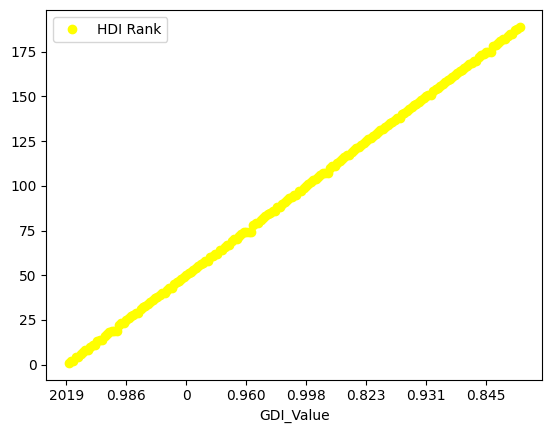

In [35]:
gd.plot(x='GDI_Value', y='HDI Rank', style='o',color='yellow')

Summarizing your analysis and observation

Outliers are data points that are far from other data points. In other words, they’re unusual values in a dataset. Outliers are problematic for many statistical analyses because they can cause tests to either miss significant findings or distort real results.

as we can see in this dataset there are no outliers in health criteria.
but in educational criteria we can see outliers of 11.5 which can be dropped

<-----------------------Question 4----------------------------->

In [ ]:
#--------------code

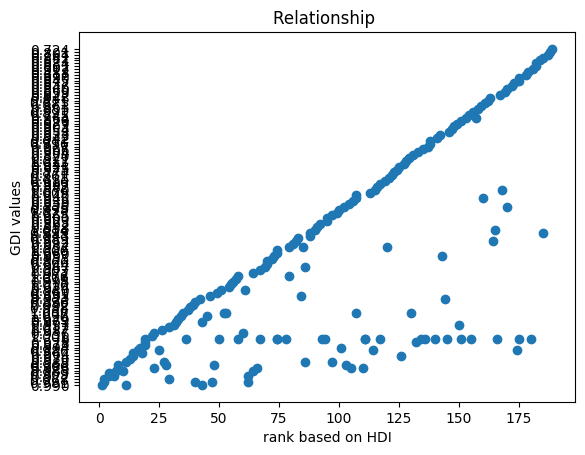

In [38]:
plt.scatter(gf['HDI Rank'], gf['GDI_Value'])
plt.xlabel('rank based on HDI')
plt.ylabel('GDI values')
plt.title('Relationship ')
plt.show()

In [40]:
gf.columns

Index(['HDI Rank', 'Country', 'GDI_Value', 'GDI_Group', 'HDI_Female',
       'HDI_Male', 'Lif_Expec_Female', 'Lif_Excep_Male',
       'Excep_Yrs_Schooling_Female', 'Excep_Yrs_Schooling_Male',
       'Mean_Yrs_Schooling_Female', 'Mean_Yrs_Schooling_Male', 'GNI_PC_Female',
       'GNI_PC_Male'],
      dtype='object')

In [41]:
px.bar(gf.head(10).sort_values(by=['Mean_Yrs_Schooling_Female']),x="Country",y="Mean_Yrs_Schooling_Female",title="Average number of years a female is educated in the top 10 HDI ranked contries")

In [45]:
px.bar(gf.head(10).sort_values(by=['Mean_Yrs_Schooling_Male']),x="Country",y="Mean_Yrs_Schooling_Male",title="Average number of years a male is educated in the top 10 HDI ranked contries")

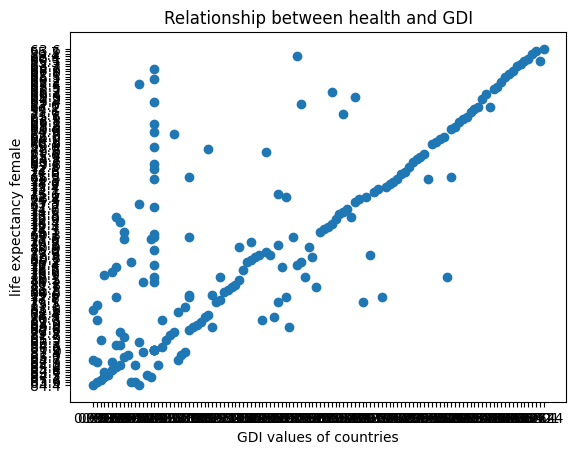

In [48]:
plt.scatter(gf['GDI_Value'], gf['Lif_Expec_Female'])
plt.xlabel('GDI values of countries')
plt.ylabel('life expectancy female')
plt.title('Relationship between health and GDI')
plt.show()

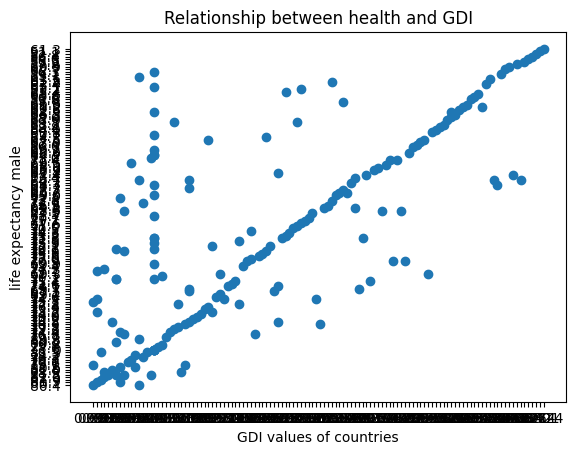

In [50]:
plt.scatter(gf['GDI_Value'], gf['Lif_Excep_Male'])
plt.xlabel('GDI values of countries')
plt.ylabel('life expectancy male')
plt.title('Relationship between health and GDI')
plt.show()

In [ ]:
# Add more cells if required

Summarizing your analysis and observations

The average years for which a female receives education in a top HDI ranked country is 12-14, whereas it is a maximum of 3 years in a country ranked bottom 10 on the HDI index


The average years for which a male receives education in a top HDI ranked country is 12-14.4, whereas it is a maximum of 5.2 years in a country ranked bottom 10 on the HDI index

<-----------------------Question 5----------------------------->

In [ ]:
#----------code
#data preprocessing and normalisation

#Handling missing

#Dropping rows
#Drop column
#Estimate (Approximate) -> Fill

In [51]:
gf.describe()

,HDI Rank
count,189.000000
mean,94.783069
std,54.754486
min,1.000000
25%,48.000000
50%,95.000000
75%,142.000000
max,189.000000


In [53]:
gf.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
185    False
186    False
187    False
188    False
189    False
Length: 189, dtype: bool

In [54]:
gf.isnull().sum()

HDI Rank                      0
Country                       0
GDI_Value                     0
GDI_Group                     0
HDI_Female                    0
HDI_Male                      0
Lif_Expec_Female              0
Lif_Excep_Male                0
Excep_Yrs_Schooling_Female    0
Excep_Yrs_Schooling_Male      0
Mean_Yrs_Schooling_Female     0
Mean_Yrs_Schooling_Male       0
GNI_PC_Female                 0
GNI_PC_Male                   0
dtype: int64

In [55]:
print(gf[gf.GDI_Value != 0])

     HDI Rank                   Country GDI_Value GDI_Group HDI_Female  \
1         1.0                    Norway     0.990         1      0.949   
2         2.0                   Ireland     0.981         1      0.943   
3         2.0               Switzerland     0.968         2      0.934   
4         4.0    Hong Kong, China (SAR)     0.972         2      0.933   
5         4.0                   Iceland     0.969         2      0.933   
..        ...                       ...       ...       ...        ...   
185     185.0                   Burundi     0.999         1      0.432   
186     185.0               South Sudan     0.842         5      0.384   
187     187.0                      Chad     0.764         5      0.342   
188     188.0  Central African Republic     0.801         5      0.351   
189     189.0                     Niger     0.724         5      0.321   

    HDI_Male Lif_Expec_Female Lif_Excep_Male Excep_Yrs_Schooling_Female  \
1      0.959             84.4       

Summarizing your analysis and observation

data preprocessing technique used to transform features in a dataset to a common scale, improving the performance and accuracy of machine learning algorithms. The main goal of normalization is to eliminate the potential biases and distortions caused by the different scales of features.

# **TASK 2** - Classification/Regression

Perform following steps on the same dataset which you used for EDA.
> - Data Preprocessing (as per requirement)
> - Feature Engineering
> - Split dataset in train-test (80:20 ratio)
> - Model selection
> - Model training
> - Model evaluation
> - Fine-tune the Model
> - Make predictions

Summarize your model's performance by evaluation metrices



In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [57]:
#explore data
gf.head()
gf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 1 to 189
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HDI Rank                    189 non-null    float64
 1   Country                     189 non-null    object 
 2   GDI_Value                   189 non-null    object 
 3   GDI_Group                   189 non-null    object 
 4   HDI_Female                  189 non-null    object 
 5   HDI_Male                    189 non-null    object 
 6   Lif_Expec_Female            189 non-null    object 
 7   Lif_Excep_Male              189 non-null    object 
 8   Excep_Yrs_Schooling_Female  189 non-null    object 
 9   Excep_Yrs_Schooling_Male    189 non-null    object 
 10  Mean_Yrs_Schooling_Female   189 non-null    object 
 11  Mean_Yrs_Schooling_Male     189 non-null    object 
 12  GNI_PC_Female               189 non-null    object 
 13  GNI_PC_Male                 189 non

In [58]:
#split the data
x=gf.drop('GDI_Group',axis=1)
y=gf['GDI_Group']

In [59]:
x

,HDI Rank,Country,GDI_Value,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
1,1.0,Norway,0.990,0.949,0.959,84.4,80.4,18.8,17.4,13.0,12.8,"58,548","74,280"
2,2.0,Ireland,0.981,0.943,0.961,83.9,80.7,18.8,18.6,12.9,12.4,"55,540","81,401"
3,2.0,Switzerland,0.968,0.934,0.965,85.6,81.9,16.2,16.4,12.7,13.6,"57,840","81,137"
4,4.0,"Hong Kong, China (SAR)",0.972,0.933,0.959,87.7,82.0,17.1,16.8,11.9,12.7,"45,961","82,993"
5,4.0,Iceland,0.969,0.933,0.963,84.5,81.5,20.2,18.0,12.6,13.0,"46,413","62,883"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,185.0,Burundi,0.999,0.432,0.432,63.4,59.8,11.0,11.1,2.6,4.1,866,640
186,185.0,South Sudan,0.842,0.384,0.456,59.4,56.4,3.5,5.9,3.9,5.2,"1,759","2,247"
187,187.0,Chad,0.764,0.342,0.448,55.7,52.8,5.9,8.8,1.3,3.8,"1,244","1,868"
188,188.0,Central African Republic,0.801,0.351,0.438,55.5,51.1,6.2,8.9,3.0,5.6,792,"1,197"


In [60]:
#split dataset in train-test (80:20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [61]:
x_train

,HDI Rank,Country,GDI_Value,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
112,111.0,Turkmenistan,0,0,0,71.7,64.7,10.9,11.5,0,0,"10,493","19,461"
9,8.0,Netherlands,0.966,0.926,0.960,84.0,80.6,18.8,18.2,12.2,12.7,"46,815","68,685"
107,107.0,Bolivia (Plurinational State of),0.945,0.696,0.737,74.5,68.7,14.2,14.2,8.3,9.8,"6,481","10,610"
90,90.0,Moldova (Republic of),1.014,0.754,0.744,76.2,67.6,11.8,11.3,11.8,11.6,"11,994","15,477"
91,91.0,Algeria,0.858,0.671,0.782,78.1,75.7,14.8,14.4,7.7,8.3,"3,296","18,891"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,104.0,Tonga,0.950,0.702,0.739,72.9,69.0,14.6,14.0,11.3,11.2,"4,311","8,416"
68,67.0,Trinidad and Tobago,1.003,0.796,0.793,76.2,70.9,14.0,12.0,11.1,10.9,"20,482","32,121"
118,117.0,Viet Nam,0.997,0.703,0.705,79.5,71.3,12.9,12.5,8.0,8.6,"6,644","8,224"
48,48.0,Montenegro,0.966,0.814,0.843,79.3,74.4,15.4,14.7,10.9,12.3,"17,518","25,368"


In [62]:
x_test

,HDI Rank,Country,GDI_Value,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
109,107.0,Philippines,1.007,0.720,0.715,75.5,67.3,13.5,12.8,9.6,9.2,"7,843","11,694"
75,74.0,Mexico,0.960,0.760,0.792,77.9,72.2,15.0,14.6,8.6,8.9,"12,765","25,838"
162,162.0,Côte d'Ivoire,0.811,0.476,0.586,59.1,56.6,9.0,10.9,4.2,6.4,"2,561","7,531"
96,95.0,Tunisia,0.900,0.689,0.766,78.7,74.7,15.8,14.3,6.5,8.0,"4,587","16,341"
124,124.0,El Salvador,0.975,0.662,0.679,77.8,68.5,11.5,11.7,6.6,7.3,"6,471","10,501"
72,72.0,Sri Lanka,0.955,0.759,0.794,80.3,73.6,14.5,13.8,10.6,10.6,"7,433","18,423"
19,19.0,Israel,0.973,0.904,0.929,84.5,81.3,16.8,15.6,13.1,13.0,"29,665","50,819"
125,125.0,Tajikistan,0.823,0.586,0.712,73.4,68.9,10.7,12.6,10.2,11.3,"1,440","6,427"
144,144.0,Cambodia,0.922,0.570,0.618,71.9,67.5,11.0,11.9,4.2,5.8,"3,697","4,822"
8,8.0,Australia,0.976,0.932,0.955,85.4,81.5,22.4,21.5,12.8,12.7,"39,287","56,954"


In [63]:
#display the shapes of the train and test sets
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (151, 13)
x_test shape: (38, 13)
y_train shape: (151,)
y_test shape: (38,)


In [64]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [70]:
#selecting the features for modelling
features = ['HDI Rank','GDI_Value','HDI_Female']
target = 'GDI_Group'
x = gf[features]
y = gf[target]

In [71]:
#split the data into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [72]:
#define models for model slection

models = [('Logistic Regression', LogisticRegression(max_iter=1000)),
          ('Random Forest', RandomForestClassifier()
)]
models

[('Logistic Regression', LogisticRegression(max_iter=1000)),
 ('Random Forest', RandomForestClassifier())]

In [73]:
model = LogisticRegression()

In [74]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [76]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5789473684210527


The LOGISTIC REGRESSION MODEL has been used for the classification
